In [82]:
from sklearn.svm import SVR
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# with normalisation

0.9821040311926316
Test RMSE: 58.421


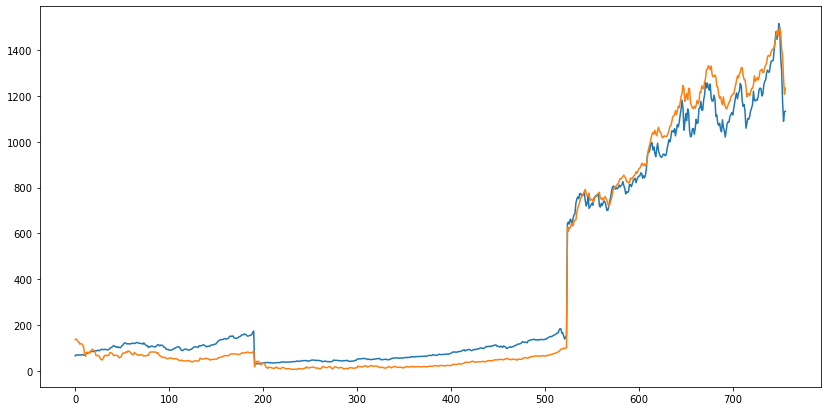

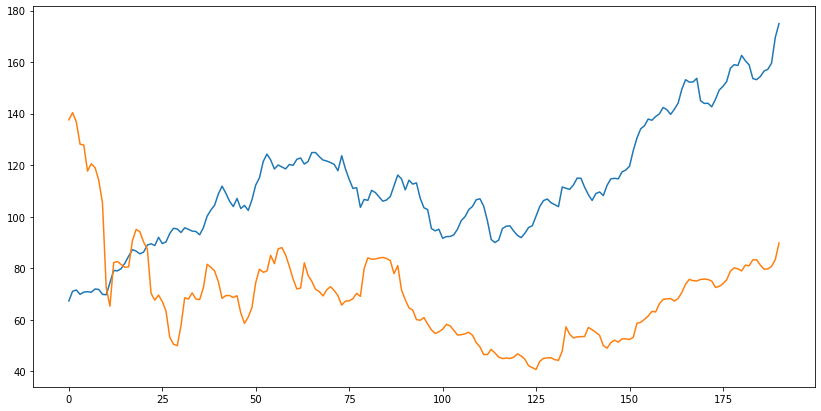

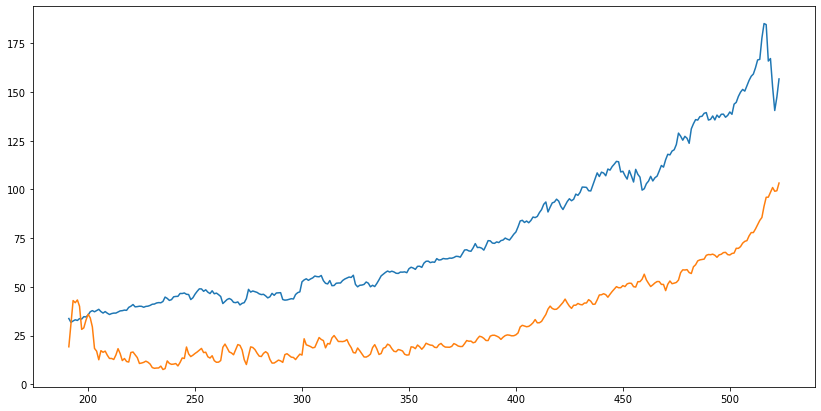

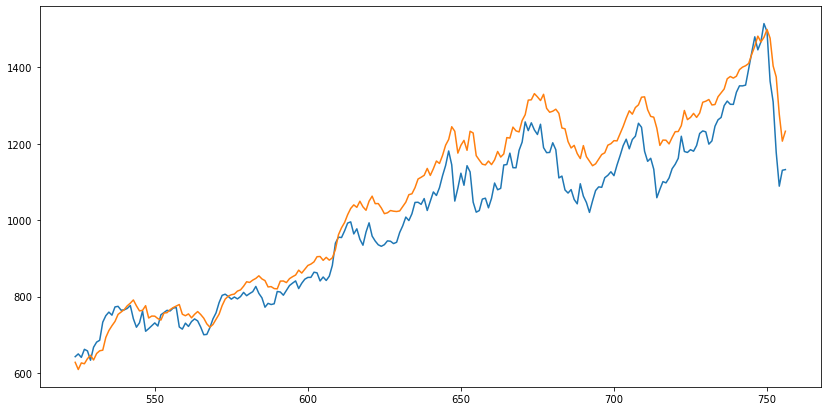

In [83]:
df_train = pd.read_csv('../Shu Rui/train.csv')
df_test = pd.read_csv('../Shu Rui/test.csv')
train = pd.read_csv('../Shu Rui/train.csv')
test = pd.read_csv('../Shu Rui/test.csv')

# normalise
scaler_vol_X = MinMaxScaler(feature_range=(0, 1))
scaler_close_X = MinMaxScaler(feature_range=(0, 1))
scaler_close_y = MinMaxScaler(feature_range=(0, 1))
vol_var = ['Volume (t-10)', 'Volume (t-9)', 'Volume (t-8)', 'Volume (t-7)', 'Volume (t-6)', 
       'Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)']
close_var = ['Close (t-10)', 'Close (t-9)', 'Close (t-8)', 'Close (t-7)', 'Close (t-6)',
       'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)']
train[vol_var] = scaler_vol_X.fit_transform(train[vol_var])
train[close_var] = scaler_close_X.fit_transform(train[close_var])
train[['Close (t)']] = scaler_close_y.fit_transform(train[['Close (t)']])
test[vol_var] = scaler_vol_X.fit_transform(test[vol_var])
test[close_var] = scaler_close_X.fit_transform(test[close_var])
test[['Close (t)']] = scaler_close_y.fit_transform(test[['Close (t)']])

# split X and y
ind_var = ['Volume (t-10)', 'Volume (t-9)', 'Volume (t-8)', 'Volume (t-7)', 'Volume (t-6)', 
           'Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)', 
           'Close (t-10)', 'Close (t-9)', 'Close (t-8)', 'Close (t-7)', 'Close (t-6)',
           'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)']
train_X = train[ind_var]
train_y_close = train['Close (t)']
train_y_movement = train['movement']
test_X = test[ind_var]
test_y_close = test['Close (t)']
test_y_movement = test['movement']

svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(train_X, train_y_close)

svm_confidence = svr.score(test_X, test_y_close)
print(svm_confidence)

pred_y_close = svr.predict(test_X)
pred_y_close = pred_y_close.reshape(-1, 1)
pred_y_close = scaler_close_y.inverse_transform(pred_y_close)
pred_y_close = pd.DataFrame(pred_y_close)
test_y_close = df_test['Close (t)']
rmse = sqrt(mean_squared_error(test_y_close, pred_y_close))
print('Test RMSE: %.3f' % rmse)


test_apple = test_y_close[:191]
test_microsoft = test_y_close[191:524]
test_google = test_y_close[524:757]

predict_apple = pred_y_close[:191]
predict_microsoft = pred_y_close[191:524]
predict_google = pred_y_close[524:757]

plt.figure(figsize=(14,7))
plt.plot(test_y_close)
plt.plot(pred_y_close)

plt.figure(figsize=(14,7))
plt.plot(test_apple)
plt.plot(predict_apple)

plt.figure(figsize=(14,7))
plt.plot(test_microsoft)
plt.plot(predict_microsoft)

plt.figure(figsize=(14,7))
plt.plot(test_google)
plt.plot(predict_google)

In [84]:
# binary
predict_y_movement = [0]

arr = np.array(pred_y_close)
for i in range(0, len(arr) - 1):
    if arr[i] < arr[i + 1]:
        predict_y_movement.append(1)
    else:
        predict_y_movement.append(0)
        
bin_test_apple = test_y_movement[:191]
bin_test_microsoft = test_y_movement[191:524]
bin_test_google = test_y_movement[524:757]
bin_pred_apple = predict_y_movement[:191]
bin_pred_microsoft = predict_y_movement[191:524]
bin_pred_google = predict_y_movement[524:757]

print('Overall:')
print(confusion_matrix(test_y_movement, predict_y_movement))
print('Precision: %.3f' % precision_score(test_y_movement, predict_y_movement))
print('Recall: %.3f' % recall_score(test_y_movement, predict_y_movement))
print('Accuracy: %.3f' % accuracy_score(test_y_movement, predict_y_movement))
print('F1-score: %.3f\n' % f1_score(test_y_movement, predict_y_movement))

print('Apple:')
print(confusion_matrix(bin_test_apple, bin_pred_apple))
print('Precision: %.3f' % precision_score(bin_test_apple, bin_pred_apple))
print('Recall: %.3f' % recall_score(bin_test_apple, bin_pred_apple))
print('Accuracy: %.3f' % accuracy_score(bin_test_apple, bin_pred_apple))
print('F1-score: %.3f\n' % f1_score(bin_test_apple, bin_pred_apple))

print('Microsoft:')
print(confusion_matrix(bin_test_microsoft, bin_pred_microsoft))
print('Precision: %.3f' % precision_score(bin_test_microsoft, bin_pred_microsoft))
print('Recall: %.3f' % recall_score(bin_test_microsoft, bin_pred_microsoft))
print('Accuracy: %.3f' % accuracy_score(bin_test_microsoft, bin_pred_microsoft))
print('F1-score: %.3f\n' % f1_score(bin_test_microsoft, bin_pred_microsoft))

print('Google:')
print(confusion_matrix(bin_test_google, bin_pred_google))
print('Precision: %.3f' % precision_score(bin_test_google, bin_pred_google))
print('Recall: %.3f' % recall_score(bin_test_google, bin_pred_google))
print('Accuracy: %.3f' % accuracy_score(bin_test_google, bin_pred_google))
print('F1-score: %.3f\n' % f1_score(bin_test_google, bin_pred_google))

Overall:
[[117 101]
 [217 322]]
Precision: 0.761
Recall: 0.597
Accuracy: 0.580
F1-score: 0.669

Apple:
[[31 30]
 [69 61]]
Precision: 0.670
Recall: 0.469
Accuracy: 0.482
F1-score: 0.552

Microsoft:
[[ 38  41]
 [114 140]]
Precision: 0.773
Recall: 0.551
Accuracy: 0.535
F1-score: 0.644

Google:
[[ 48  30]
 [ 34 121]]
Precision: 0.801
Recall: 0.781
Accuracy: 0.725
F1-score: 0.791



# without normalisation

-0.3373877403586556
Test RMSE: 505.037


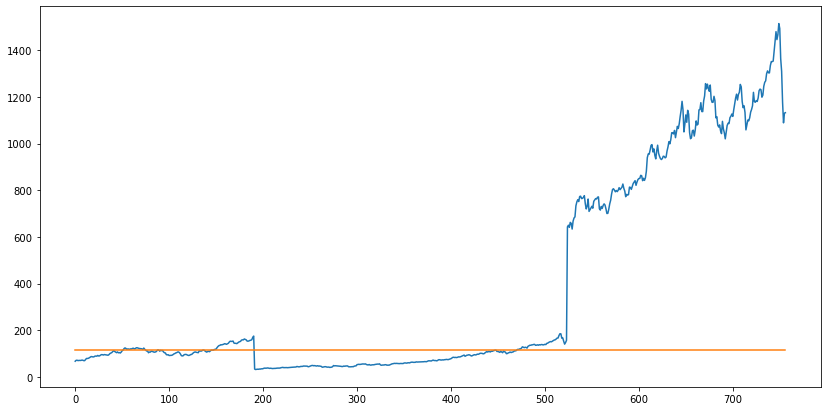

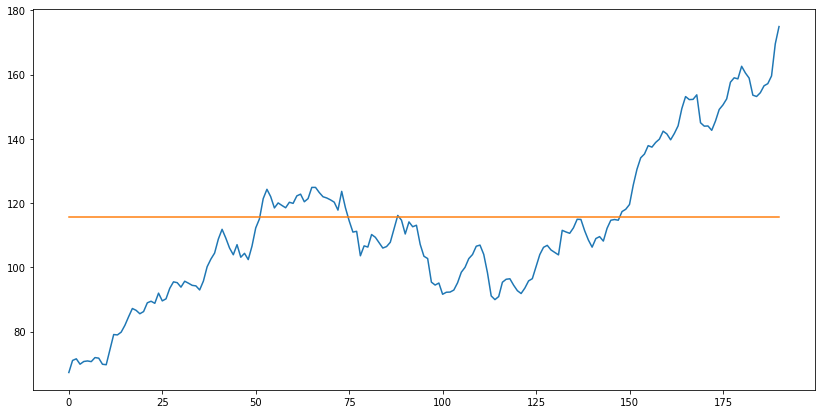

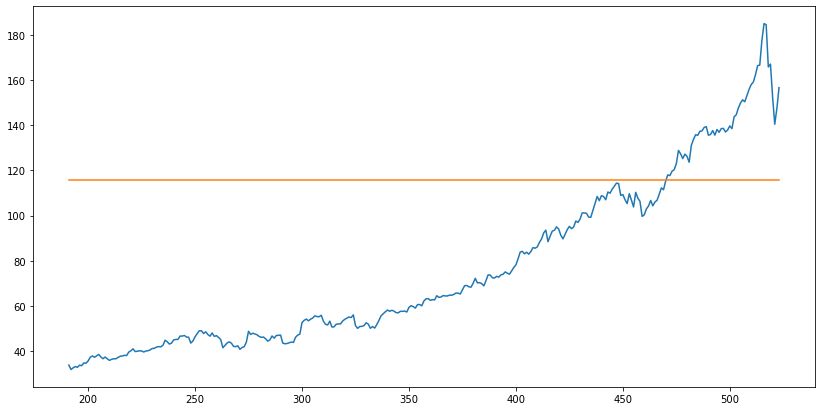

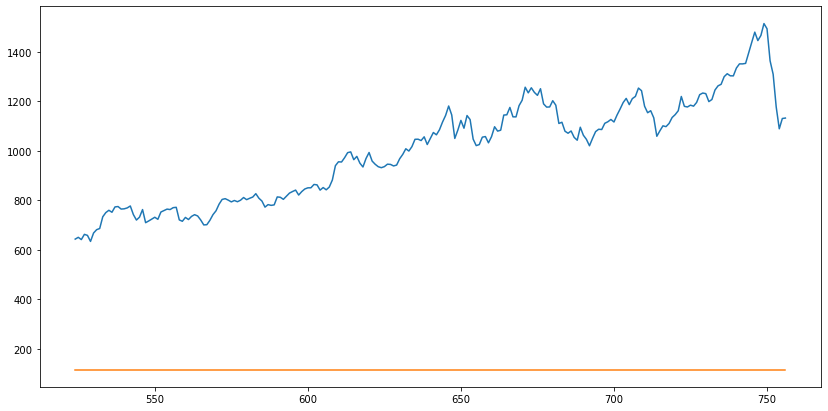

In [77]:
train = pd.read_csv('../Shu Rui/train.csv')
test = pd.read_csv('../Shu Rui/test.csv')

# split X and y
ind_var = ['Volume (t-10)', 'Volume (t-9)', 'Volume (t-8)', 'Volume (t-7)', 'Volume (t-6)', 
           'Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)', 
           'Close (t-10)', 'Close (t-9)', 'Close (t-8)', 'Close (t-7)', 'Close (t-6)',
           'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)']
train_X = train[ind_var]
train_y_close = train['Close (t)']
train_y_movement = train['movement']
test_X = test[ind_var]
test_y_close = test['Close (t)']
test_y_movement = test['movement']

svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(train_X, train_y_close)

svm_confidence = svr.score(test_X, test_y_close)
print(svm_confidence)

pred_y_close = svr.predict(test_X)
pred_y_close = pd.DataFrame(pred_y_close)
test_y_close = df_test['Close (t)']
rmse = sqrt(mean_squared_error(test_y_close, pred_y_close))
print('Test RMSE: %.3f' % rmse)


test_apple = test_y_close[:191]
test_microsoft = test_y_close[191:524]
test_google = test_y_close[524:757]

predict_apple = pred_y_close[:191]
predict_microsoft = pred_y_close[191:524]
predict_google = pred_y_close[524:757]

plt.figure(figsize=(14,7))
plt.plot(test_y_close)
plt.plot(pred_y_close)

plt.figure(figsize=(14,7))
plt.plot(test_apple)
plt.plot(predict_apple)

plt.figure(figsize=(14,7))
plt.plot(test_microsoft)
plt.plot(predict_microsoft)

plt.figure(figsize=(14,7))
plt.plot(test_google)
plt.plot(predict_google)

In [79]:

print(test_X)

     Volume (t-10)  Volume (t-9)  Volume (t-8)  Volume (t-7)  Volume (t-6)  \
0       61096968.8   175378946.4    95754348.4    91204090.4    87256553.6   
1       96193990.8    98646688.8   175378946.4    95754348.4    91204090.4   
2      104578684.4    86759695.2    98646688.8   175378946.4    95754348.4   
3       81652929.4    76861231.0    86759695.2    98646688.8   175378946.4   
4      110674608.0    78927618.6    76861231.0    86759695.2    98646688.8   
..             ...           ...           ...           ...           ...   
752      1357460.0     2992940.0     1664300.0     1503080.0     2706140.0   
753      1136600.0     2924720.0     2992940.0     1664300.0     1503080.0   
754      1730200.0     3798500.0     2924720.0     2992940.0     1664300.0   
755      1306940.0     4168520.0     3798500.0     2924720.0     2992940.0   
756      1862480.0     3608840.0     4168520.0     3798500.0     2924720.0   

     Volume (t-5)  Volume (t-4)  Volume (t-3)  Volume (t-2)  Vo